<center>

> <h1><span style="color:purple "> Mina Adel Markos -- junior Data Scientist</span></h2>
    
> <h3><b><span style="color:navy">LINKEDIN :- </span><a href='https://www.linkedin.com/in/mina-markos-343b8b171/'><b>Click HERE</b></a> </b></h3>  
> <h3><b><span style="color:navy"> GITHUB :- </span> <a href='https://github.com/MINAADELMARKOS'><b>Click HERE</b></a> </b></h3>

</center>

# **Sample Super store Analysis**


# **The Goal**
Perform "Exploratory Data Analysis" on dataset "SampleSuperstore"
find the weak areas where you can work to make more profit


### **The Author** :- **Mina Adel Markos**



# **About Bussiness :-**

The exponential rise of digital literacy and awareness has made online shopping such an integral and inevitable part of our lifestyle. The biggest perk of this kind of shopping is that it can be done within minutes, at the ease and comfort of your house or wherever you are, by just clicking a tab.Our job is to evaluate sales data and find weak points and chances for Super Store to improve its business.


<center>
<img src="hgf.png" alt="" width="400px" height="150px">
</center>



# **About Dataset**

## **Context**

This is a sample superstore dataset, a kind of a simulation where you perform extensive data analysis to deliver insights on how the company can increase its profits while minimizing the losses.




## **Data Analyst Questions :-**

- Top 10 Cities have most profit 

- Which Category sells the most and is the most profitable?

- Top 10 States have most profit 

- What is the most profitable sub-category?

- What is the most popular sub-category?

- What is the most profitable customer segment?

- What is the most preferred ship mode?

- What is the most profitable region?

- Which city has the highest sales volume?

- Which category sells the most and is the most profitable?


### **Importing Libraries**

In [110]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import pgeocode
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import kaleido
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

### **Importing Dataset**

In [111]:
super_df = pd.read_csv('SampleSuperstore.csv')

In [112]:
super_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### **Data Cleaning**


In [113]:
# Count Rows and columns
super_df.shape

(9994, 13)

In [114]:
super_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [115]:
# calculate sum null value in dataset
super_df.isna().sum()

#We hanven't null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# **Descriptive Statistics**

In [116]:
#Summry statistics
super_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


- Sales :- mean = 229.858001 and Median = 54.490000

- Profit :- Mean = 28.656896 and Median = 8.666500

In [117]:
# summry for datatype Object
super_df.describe(include='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


# **Check Unique Values**

In [118]:
#unique no. of rows in each columns
super_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [119]:
super_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [120]:
super_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [121]:
super_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [122]:
super_df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [123]:
super_df['Category'].value_counts().sum()
Categ_per = super_df['Category'].value_counts().to_frame().sort_index()
Categ_per['percentage %'] = (Categ_per['Category'] / super_df['Category'].value_counts().sum())*100

In [124]:
Categ_per

,Category,percentage %
Furniture,2121,21.222734
Office Supplies,6026,60.296178
Technology,1847,18.481089


In [125]:
super_df['Region'].value_counts().sum()
region_per = super_df['Region'].value_counts().to_frame().sort_index()
region_per['percentage %'] = (region_per['Region'] / super_df['Region'].value_counts().sum())*100

In [126]:
region_per.sort_values(by='Region',ascending=False)

,Region,percentage %
West,3203,32.049230
East,2848,28.497098
Central,2323,23.243946
South,1620,16.209726


In [127]:
super_df['Ship Mode'].value_counts().sum()
ships_per = super_df['Ship Mode'].value_counts().to_frame().sort_index()
ships_per['percentage %'] = (ships_per['Ship Mode'] / super_df['Ship Mode'].value_counts().sum())*100

In [128]:
ships_per

,Ship Mode,percentage %
First Class,1538,15.389234
Same Day,543,5.433260
Second Class,1945,19.461677
Standard Class,5968,59.715829


In [129]:
super_df['Segment'].value_counts().sum()
segmen_per = super_df['Segment'].value_counts().to_frame().sort_index()
segmen_per['percentage %'] = (segmen_per['Segment'] / super_df['Segment'].value_counts().sum())*100

In [130]:
segmen_per

,Segment,percentage %
Consumer,5191,51.941165
Corporate,3020,30.218131
Home Office,1783,17.840704


### **We can easily observe that:-**

 **4 methods are available for shipping the merchandise. (first - second - standard - same day)**
-  the most mode frequency is **Standard Mode** by  59% and **Second Class** by 15.4%

**There are four Regions where products are sold. (Central - East - West - South)**
-  The greatest frequency is **West Region** by  32% and **East Region** by 28%

**For buying the products, there are 3 categories.. (Furniture - Office Supplies - Technology)**
-  the most frequent category is **Office Supplies** by  60% and **Furniture** by 21%

**Finally it’s interesting to note that:-**


**For buying the products, there are 3 Clients.. (Consumer - Corporate - Home Office	)**
- the most loyal customer is **Consumer** by  51% and **Corporate** by 30%


# **Check Correlation**

In [131]:
df_corr = super_df[['Profit','Sales','Discount','Quantity']]

In [132]:
df_corr.corr()

,Profit,Sales,Discount,Quantity
Profit,1.000000,0.479064,-0.219487,0.066253
Sales,0.479064,1.000000,-0.028190,0.200795
Discount,-0.219487,-0.028190,1.000000,0.008623
Quantity,0.066253,0.200795,0.008623,1.000000


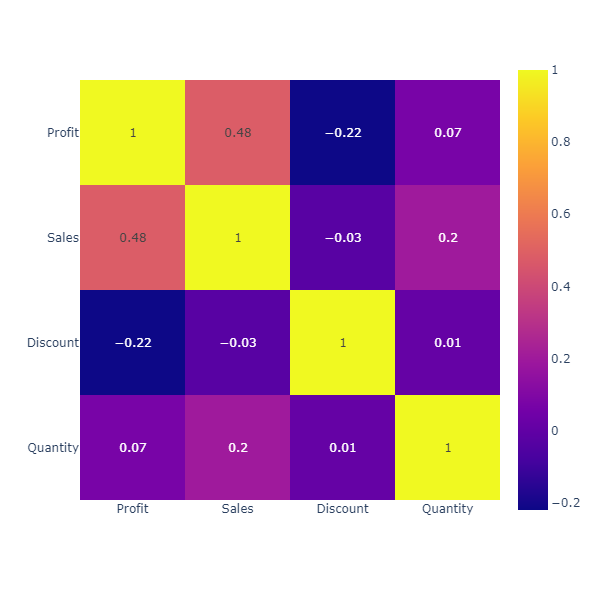

In [133]:
fig1 = px.imshow(df_corr.corr().round(2), text_auto=True,width=600, height=600)
fig1.show("png")

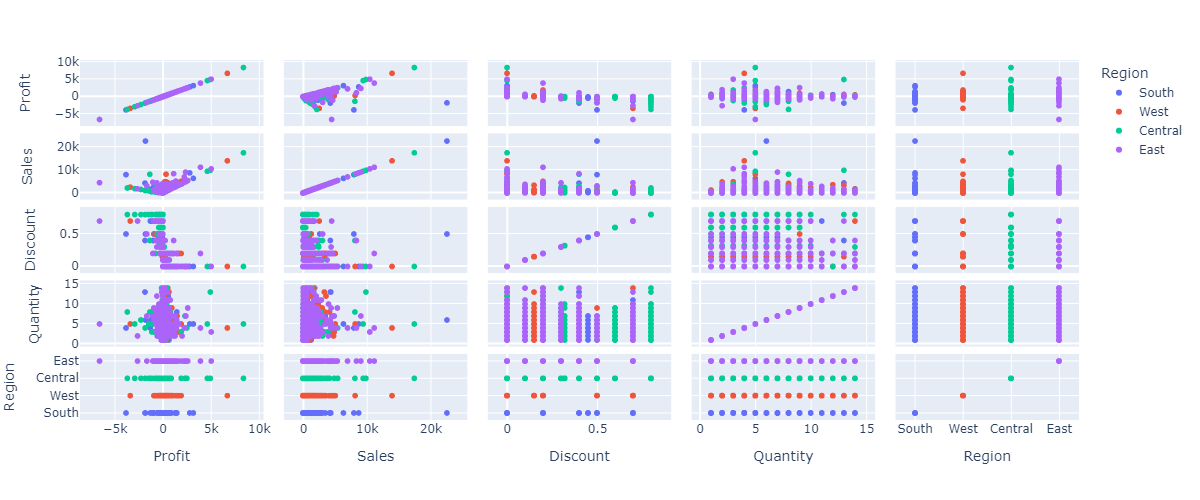

In [134]:
fig2 = px.scatter_matrix(super_df[['Profit','Sales','Discount','Quantity','Region']],color="Region",width=1200, height=500)
fig2.show("png")

the profit increase in case sales up but i can talk the quantity of product not affect on profit thatis mean there are products very expensive and people take one of little of it

**Conclusion**

- A business makes a profit or a loss at lower sales levels. But a company often makes money when sales are high.


# **Data Visulization**

In [135]:
# sum profit for each state in class type
pro_shipMode = super_df.groupby(['Ship Mode','State']).agg(
                              {'Profit':'mean','Sales':'mean'}
                              ).reset_index().sort_values(by='Profit',ascending=False)

In [136]:
pro_shipMode.to_csv('shipmoda.csv')

In [137]:
pro_shipMode.head()

,Ship Mode,State,Profit,Sales
164,Standard Class,Rhode Island,266.887647,703.502353
170,Standard Class,Vermont,206.617830,821.417000
0,First Class,Alabama,181.646089,441.498889
123,Second Class,Vermont,178.800000,715.200000
18,First Class,Michigan,173.299790,520.668857


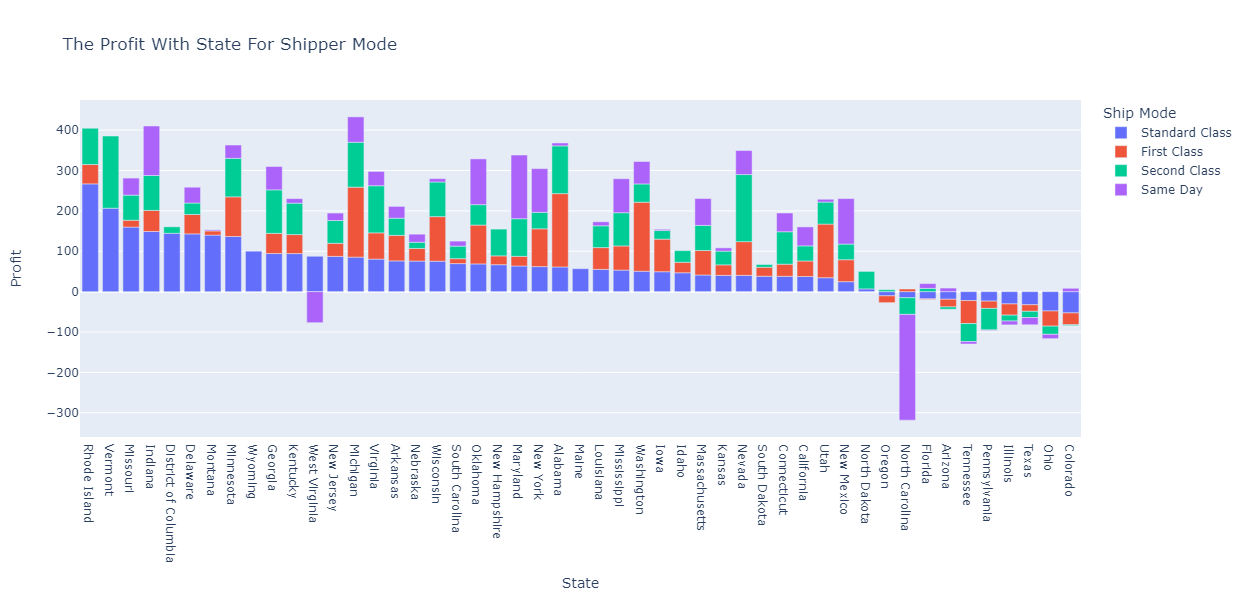

In [138]:
# par plot between state name at x-axis and profit in y-axis
fig3 = px.bar(pro_shipMode , x='State',y='Profit',
              color='Ship Mode',title = 'The Profit With State For Shipper Mode',
              width=1250, height=600
              )
fig3.show("png")
## the standard class the highest in any state

**Standard class is most profitable in classes**

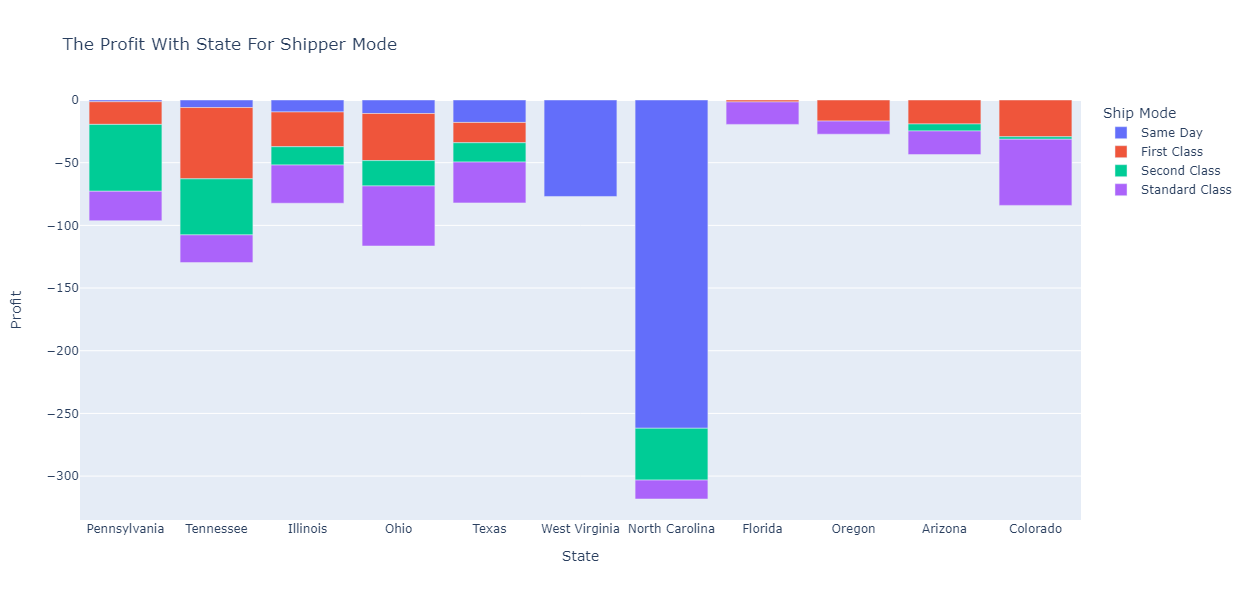

In [139]:
# par plot between state name at x-axis and profit in y-axis
fig4 = px.bar(pro_shipMode[pro_shipMode['Profit']<0], x='State',y='Profit',
              color='Ship Mode',title = 'The Profit With State For Shipper Mode',
              width=1250, height=600
              )
fig4.show("png")

## the standard class the highest in any state

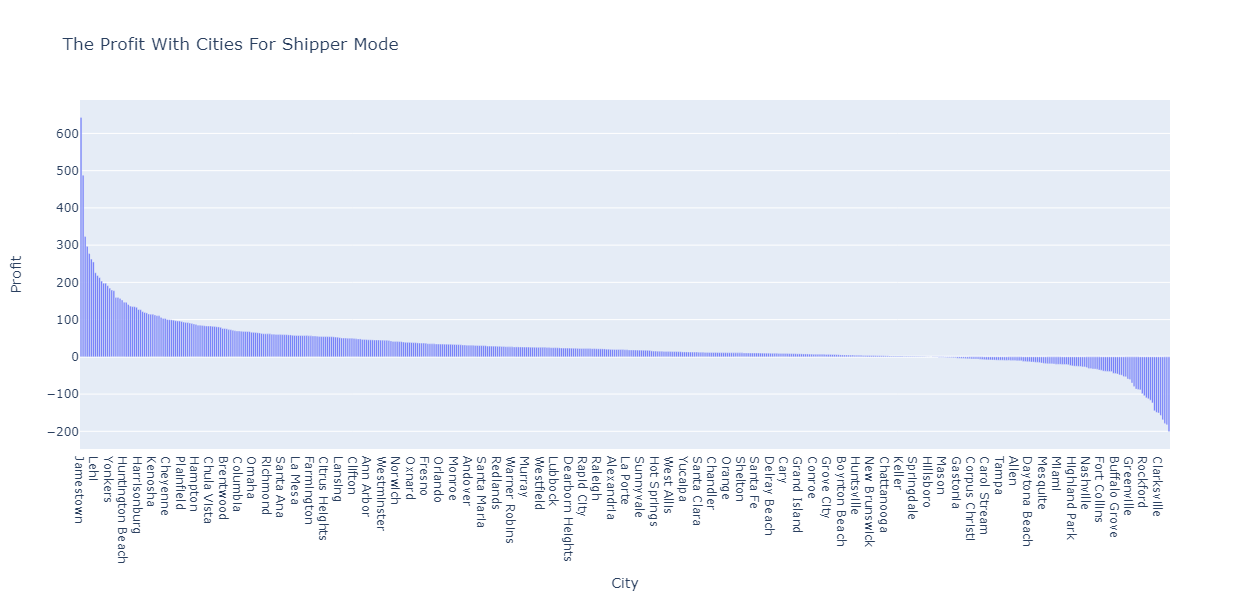

In [140]:
fig5 = px.bar(super_df.groupby('City').agg(
                              {'Profit':'mean','Sales':'mean'}
                              ).reset_index().sort_values(by='Profit',ascending=False) , 
       x='City',y='Profit',width=1250, height=600,
       
       title = 'The Profit With Cities For Shipper Mode'
       )
fig5.show("png")

In [141]:
state_loss = pd.DataFrame(
    list(
        Counter(pro_shipMode[pro_shipMode['Profit']<0]['State'].to_list()).items()
        ), columns = ['State', 'Frequency']
        )

In [142]:
state_loss

,State,Frequency
0,Pennsylvania,4
1,Florida,2
2,Colorado,3
3,Arizona,3
4,Tennessee,4
5,Illinois,4
6,Oregon,2
7,Ohio,4
8,North Carolina,3
9,Texas,4


**States that cause a company to lose money**

(['Pennsylvania',
 'Florida',
 'Colorado',
 'Arizona',
 'Tennessee',
 'Illinois',
 'Oregon',
 'Ohio',
 'North Carolina',
 'Texas',
 'West Virginia'])

In [143]:
state_high_loss= super_df[super_df['Profit'] < 0][['State', 'Category', 'Profit', 'Sales']]

In [144]:
state_high_loss.head()

,State,Category,Profit,Sales
3,Florida,Furniture,-383.0310,957.5775
14,Texas,Office Supplies,-123.8580,68.8100
15,Texas,Office Supplies,-3.8160,2.5440
23,Pennsylvania,Furniture,-1.0196,71.3720
27,Pennsylvania,Furniture,-1665.0522,3083.4300


In [145]:
state_high_loss.columns

Index(['State', 'Category', 'Profit', 'Sales'], dtype='object')

In [146]:
# the categories which loss the superstore

super_df.groupby(['Category']).agg({
    'Profit':'sum'
}).reset_index().sort_values(by='Profit',ascending=True)

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


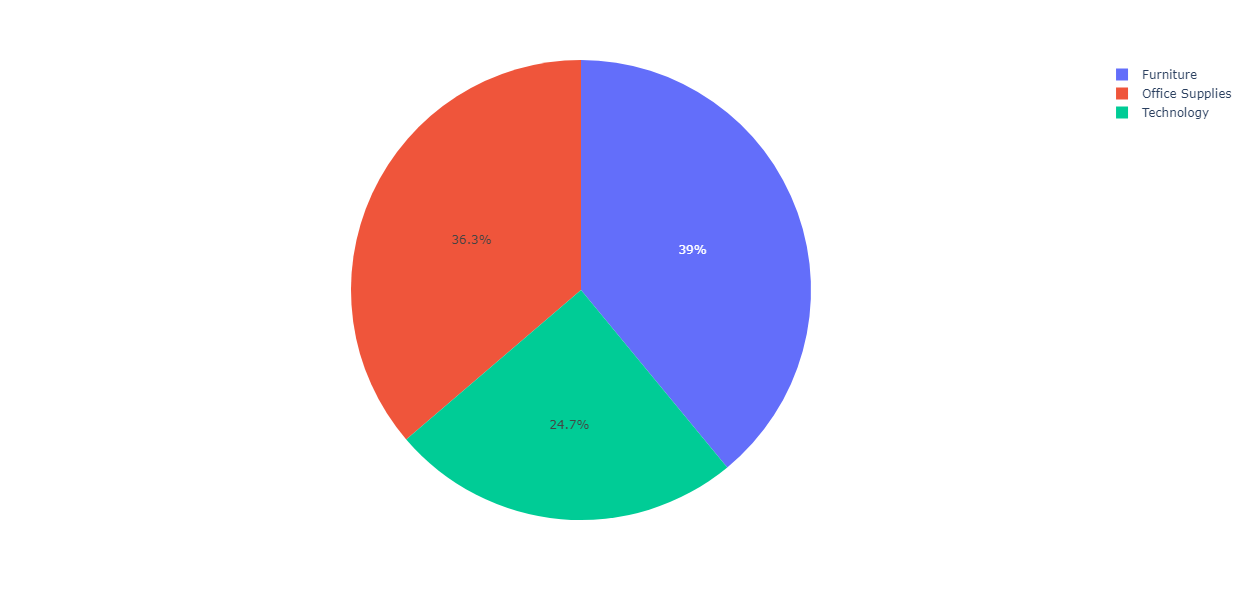

In [147]:
fig6 = px.pie(
    
state_high_loss.groupby(['Category']).agg({
    'Profit':'sum'
}).reset_index().sort_values(by='Profit',ascending=True),
names = state_high_loss.groupby(['Category']).agg({
    'Profit':'sum'
}).reset_index()['Category'] ,
values = state_high_loss.groupby(['Category']).agg({
    'Profit':'sum'
}).reset_index()['Profit'] * -1
)

fig6.show("png",width=1250, height=600)

In [148]:
# Mean Profit for each category in the shipper mode
df3 = pd.pivot_table(super_df, index='Ship Mode', values='Profit', columns='Category').reset_index()

In [149]:
df3

Category,Ship Mode,Furniture,Office Supplies,Technology
0,First Class,9.379044,20.220142,91.370643
1,Same Day,6.700407,19.704047,88.478483
2,Second Class,9.897568,23.496673,71.454116
3,Standard Class,8.301855,19.405933,76.829286


In [150]:
df3.to_csv('barcahrt.csv')

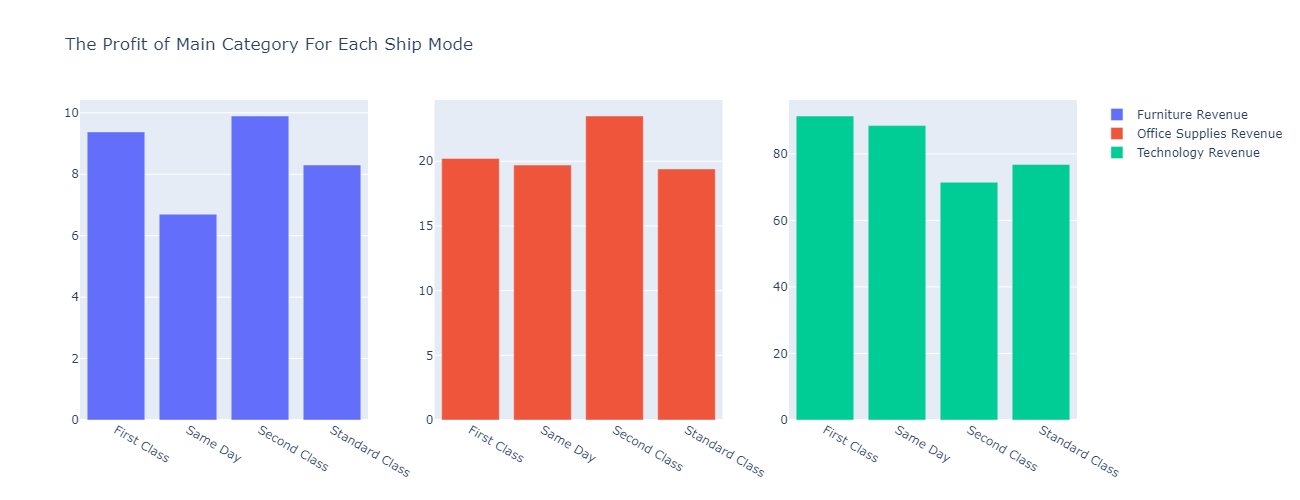

In [151]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Bar(x=df3['Ship Mode'], y=df3['Furniture'],name='Furniture Revenue'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df3['Ship Mode'], y=df3['Office Supplies'],name='Office Supplies Revenue'),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=df3['Ship Mode'], y=df3['Technology'],name='Technology Revenue'),
    row=1, col=3
)

fig.update_layout(height=500, width=1170, title_text="The Profit of Main Category For Each Ship Mode")
fig.show("png",width=1300, height=500)

In [152]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Bar(x=df3['Ship Mode'], y=df3['Furniture'],name='Furniture Revenue'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df3['Ship Mode'], y=df3['Office Supplies'],name='Office Supplies Revenue'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df3['Ship Mode'], y=df3['Technology'],name='Technology Revenue'),
    row=1, col=1
)

fig.update_layout(height=500, width=3800, title_text="The Profit of Ship Mode Per Main Category")
fig.show()

**the higher profit in the three categories is Technology then office supplies finally furniture**

**first class higher in technology but in other category the best class is second class**



In [153]:
# sum profit and sales and quantity for each main category 

category_agg_sum = super_df.groupby('Category').agg({
    'Sales':'mean',
    'Profit':'mean',
    'Quantity':'sum'
}).reset_index()

In [154]:
category_agg_sum

,Category,Sales,Profit,Quantity
0,Furniture,349.834887,8.699327,8028
1,Office Supplies,119.324101,20.327050,22906
2,Technology,452.709276,78.752002,6939


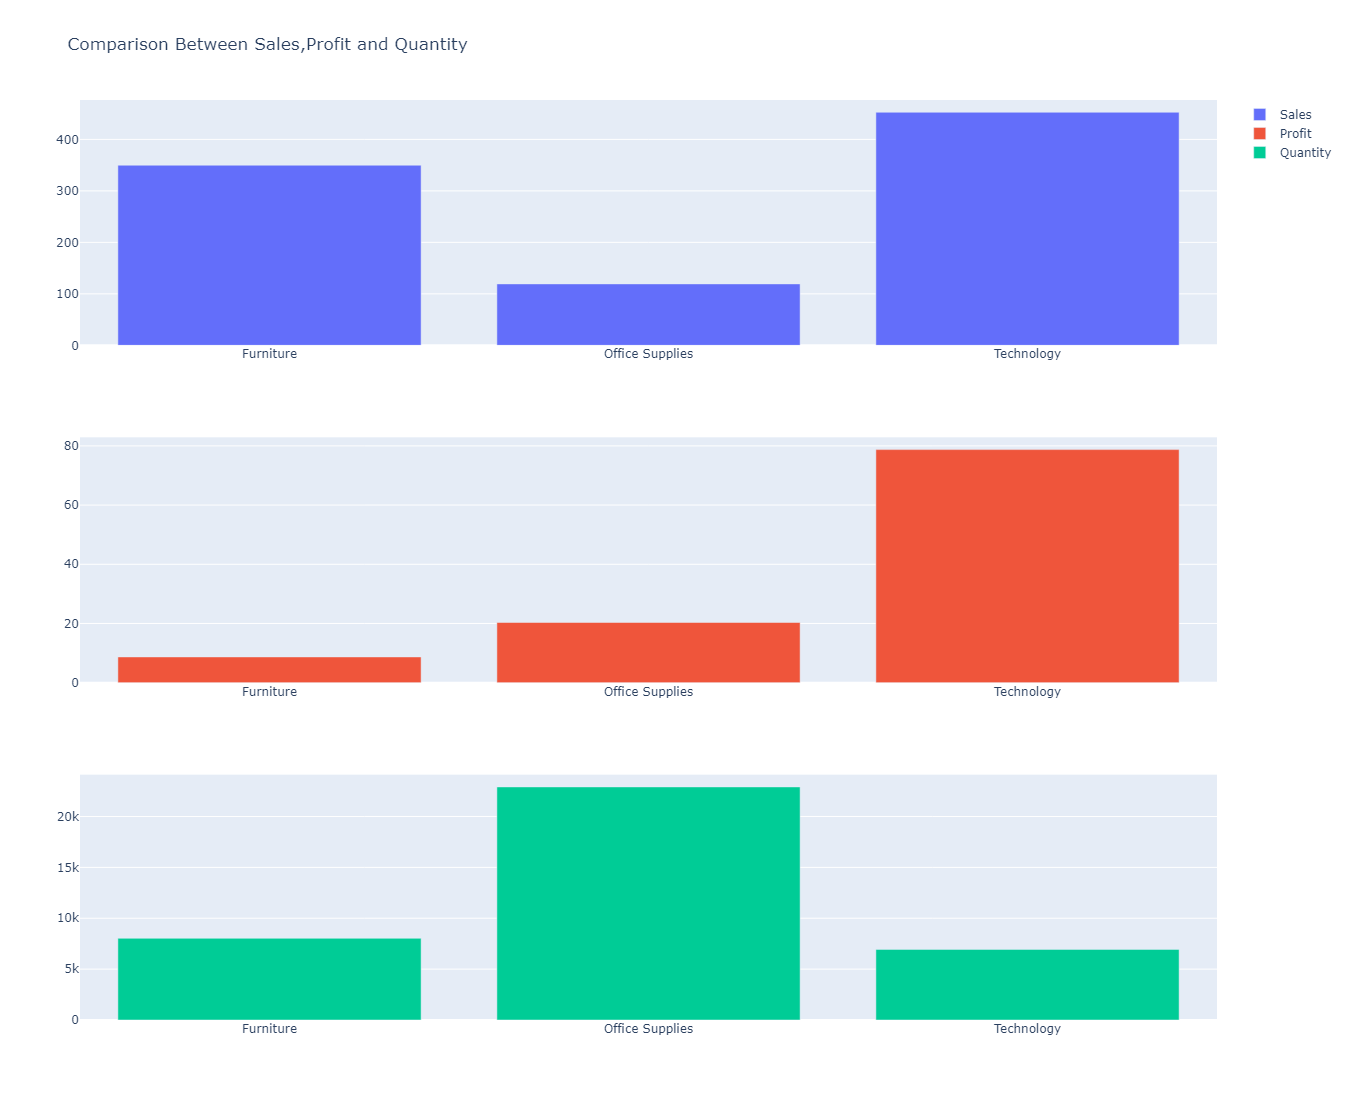

In [155]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Bar(x=category_agg_sum['Category'], y=category_agg_sum['Sales'],name='Sales'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=category_agg_sum['Category'], y=category_agg_sum['Profit'],name='Profit'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=category_agg_sum['Category'], y=category_agg_sum['Quantity'],name='Quantity'),
    row=3, col=1
)

fig.update_layout(height=1000, width=1200, title_text="Comparison Between Sales,Profit and Quantity")
fig.show("png",width=1350, height=1100)

**Furniture is most category lose profit**

In [156]:
# frequent subcategory at the loss
super_df[(super_df['Category'] == 'Furniture') & (super_df['Profit'] <0)]\
                [['Sub-Category','Profit','Segment']]\
                 ['Sub-Category'].value_counts()

Chairs         235
Tables         203
Furnishings    167
Bookcases      109
Name: Sub-Category, dtype: int64

In [157]:
# total losses for the Furniture Category for each item 

super_df[(super_df['Category'] == 'Furniture') & (super_df['Profit'] <0) ]\
          [['Sub-Category','Profit','Segment']]\
          .groupby('Sub-Category').agg(
                                      {'Profit':'sum'}
                                                      ).sort_values(by='Profit')

,Profit
Sub-Category,
Tables,-32412.1483
Bookcases,-12152.2060
Chairs,-9880.8413
Furnishings,-6490.9134


In [158]:
# frequent subcategory at the profit

super_df[(super_df['Category'] == 'Furniture') & (super_df['Profit'] > 0)]\
             [['Sub-Category','Profit','Segment']]\
             ['Sub-Category'].value_counts()

Furnishings    781
Chairs         362
Bookcases      117
Tables         114
Name: Sub-Category, dtype: int64

In [159]:
# total profit for the Furniture Category for each item 

super_df[(super_df['Category'] == 'Furniture') & (super_df['Profit']>0)]\
        [['Sub-Category','Profit','Segment']]\
        .groupby('Sub-Category').agg(
            {'Profit':'sum'}
            ).sort_values(by='Profit',ascending = False)

,Profit
Sub-Category,
Chairs,36471.0076
Furnishings,19550.0570
Tables,14686.6672
Bookcases,8679.6500


**Technology has the highest profit, sales, and low quantity.**

**Office supply category  higher profit and sales and higherest quantity**

**furniture category have large sales and quantity but little profit**


- The supermarket  spent more money on furniture sales, but as a result, there were significant losses.I think that is the cause of our supermarket loss

-  technology part have sold a few number products with high profit we we can enhance earnings by give discount on some products to sell more and more.

- the profit from office supplies low in spite of the number of products very high,we can increase products number to enhance the profitable

- We should no longer market **Tables** and **Bookcases** because it generates the least profit and the most losses.


In [160]:
# collect data lower than zero to show the most category loss the superstore
comp_loss = super_df[super_df['Profit'] < 0]

In [161]:
comp_loss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [162]:
# region for sales and Profit
reg_filter = super_df.groupby(['Region']).agg({
    'Profit':'sum',
    'Sales':'sum'
}).reset_index().sort_values(by='Profit',ascending=True)

In [163]:
reg_filter

,Region,Profit,Sales
0,Central,39706.3625,501239.8908
2,South,46749.4303,391721.9050
1,East,91522.7800,678781.2400
3,West,108418.4489,725457.8245


In [164]:
fig3 = make_subplots(rows=1, cols=2)

fig3.add_trace(
    go.Bar(x=reg_filter['Region'], y=reg_filter['Profit'],name='Revenue'),
    row=1, col=1
)

fig3.add_trace(
    go.Bar(x=reg_filter['Region'], y=reg_filter['Sales'],name='Cost of Sales'),
    row=1, col=1
)

fig3.update_layout(height=500, width=2500, title_text="The Profit VS Cost of Sales per Region")
fig3.show()

- **When compared to the Southern and center regions, the Western and Eastern regions have demonstrated better sales and profitability.**

- **The Central region has more sales than the Southern region, but it has experienced less profit growth overall.**


In [165]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
              'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
              'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
              'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
              'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
              'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
              'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA',
              'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',
              'Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV',
              'Wisconsin': 'WI','Wyoming': 'WY'}
super_df['state_code'] = super_df.State.apply(lambda x: state_code[x])

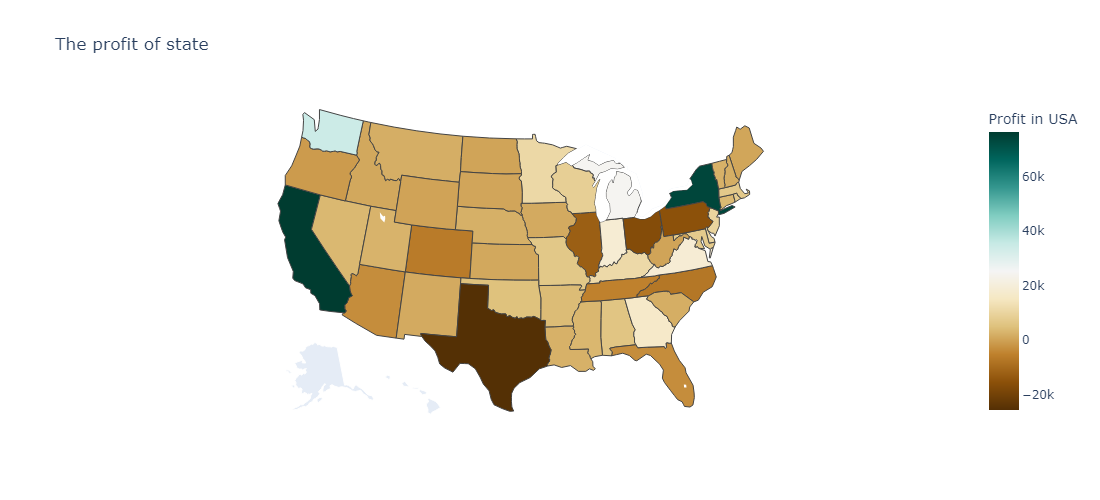

In [169]:
state_data = super_df[['Profit', 'state_code']].groupby(['state_code']).sum()

fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Profit, 
    locationmode = 'USA-states', 
    colorscale = px.colors.diverging.BrBG,
    colorbar_title = 'Profit in USA')) 

fig.update_layout(
    title_text = 'The profit of state',
    geo_scope='usa')

fig.show("png",width=1100, height=500)

**California makes the most money.** 

**The most losses have occurred in Texas.**

# **Thanks For Reading**